In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from py_cFBA import *
from scipy.integrate import trapezoid

In [2]:
import pickle

# Function to load results using Pickle
def load_results_pickle(filename='results_multiple_substrates.pkl'):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Load the results
results = load_results_pickle()

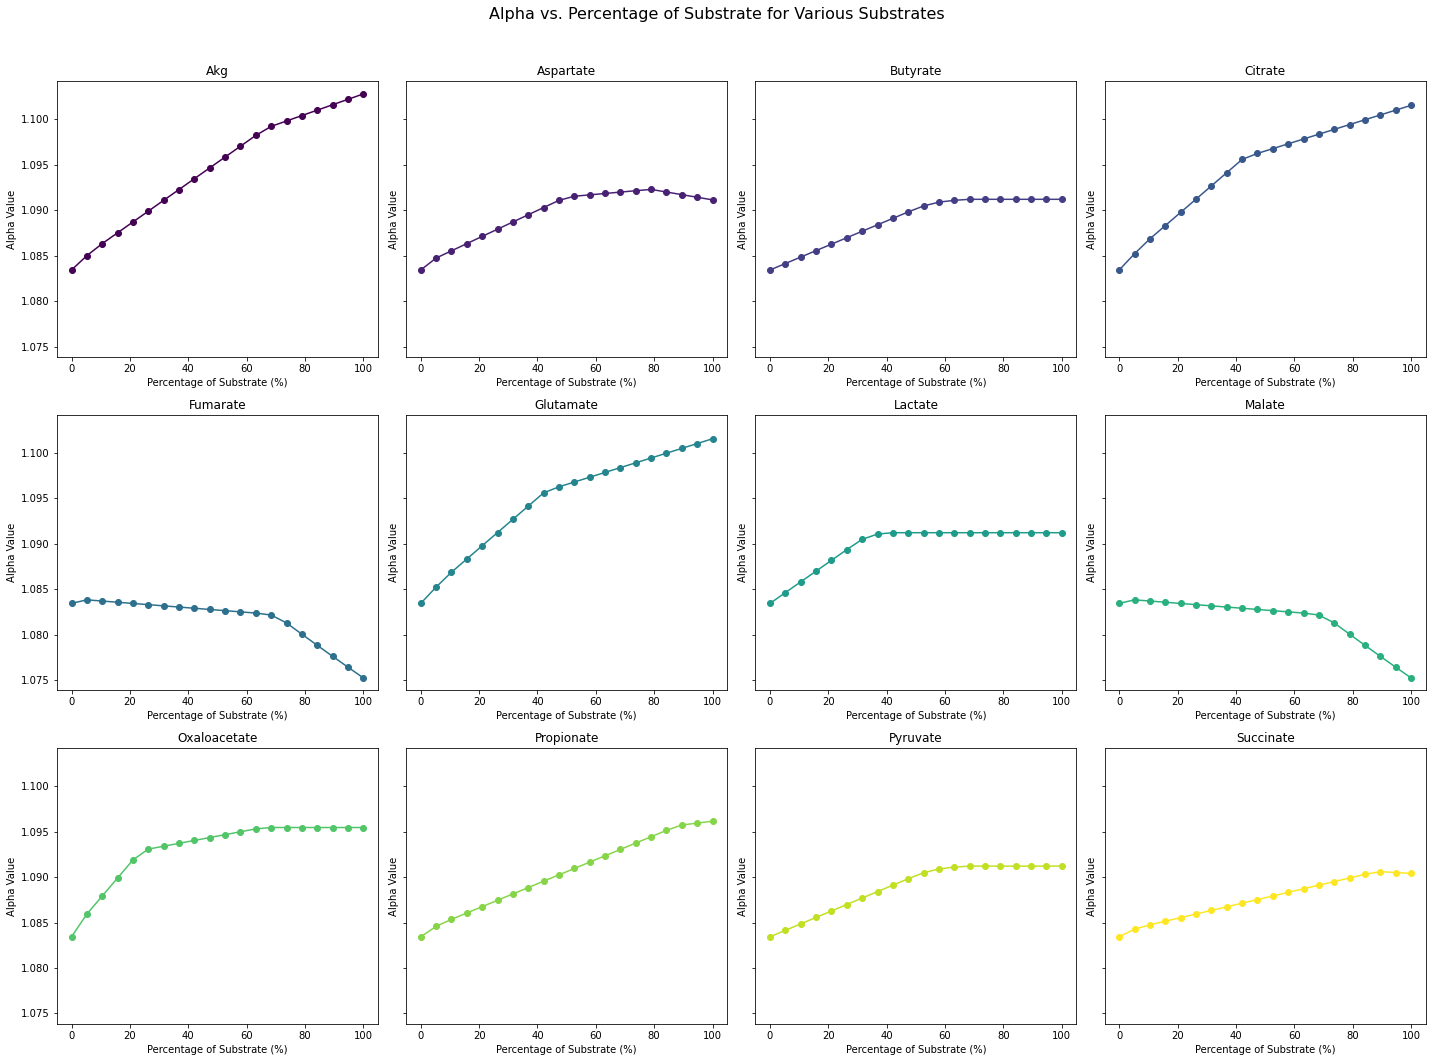

In [3]:
def plot_subplots(results):
    n_substrates = len(results)
    n_cols = 4
    n_rows = (n_substrates + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), sharey=True)
    fig.suptitle('Alpha vs. Percentage of Substrate for Various Substrates', fontsize=16)

    colors = plt.cm.viridis(np.linspace(0, 1, n_substrates))
    
    for ax, (substrate, data), color in zip(axes.flatten(), results.items(), colors):
        alpha_values = data['alpha_values']
        perc_substrate = data['perc_substrate']
        ax.plot(perc_substrate, alpha_values, marker='o', linestyle='-', color=color)
        ax.set_title(substrate.capitalize())
        ax.set_xlabel('Percentage of Substrate (%)')
        ax.set_ylabel('Alpha Value')
#         ax.grid(True)

    # Hide any empty subplots
    for ax in axes.flatten()[n_substrates:]:
        fig.delaxes(ax)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_subplots(results)


In [4]:
def find_mid_alpha_higher_than_extremes(results):
    substrates_with_mid_alpha_higher = []

    for substrate, data in results.items():
        alpha_values = data['alpha_values']
        if len(alpha_values) < 3:
            continue  # Skip if there are not enough points to check
        
        first_alpha = alpha_values[0]
        last_alpha = alpha_values[-1]
        
        for mid_alpha in alpha_values[1:-1]:
            if mid_alpha > first_alpha and mid_alpha > last_alpha:
                substrates_with_mid_alpha_higher.append(substrate)
                break  # No need to check further mid-values for this substrate

    return substrates_with_mid_alpha_higher

# Find substrates with mid alpha higher than extremes
substrates_with_mid_alpha_higher = find_mid_alpha_higher_than_extremes(results)

print("Substrates with a mid alpha value higher than both extremes:")
for substrate in substrates_with_mid_alpha_higher:
    print(substrate)


Substrates with a mid alpha value higher than both extremes:
aspartate
fumarate
malate
oxaloacetate
succinate


Area between lines for Akg: -0.1493
Area between lines for Aspartate: -0.2463
Area between lines for Butyrate: -0.1621
Area between lines for Citrate: -0.2389
Area between lines for Fumarate: -0.2391
Area between lines for Glutamate: -0.2389
Area between lines for Lactate: -0.2525
Area between lines for Malate: -0.2391
Area between lines for Oxaloacetate: -0.3786
Area between lines for Propionate: -0.0722
Area between lines for Pyruvate: -0.1621
Area between lines for Succinate: -0.0719


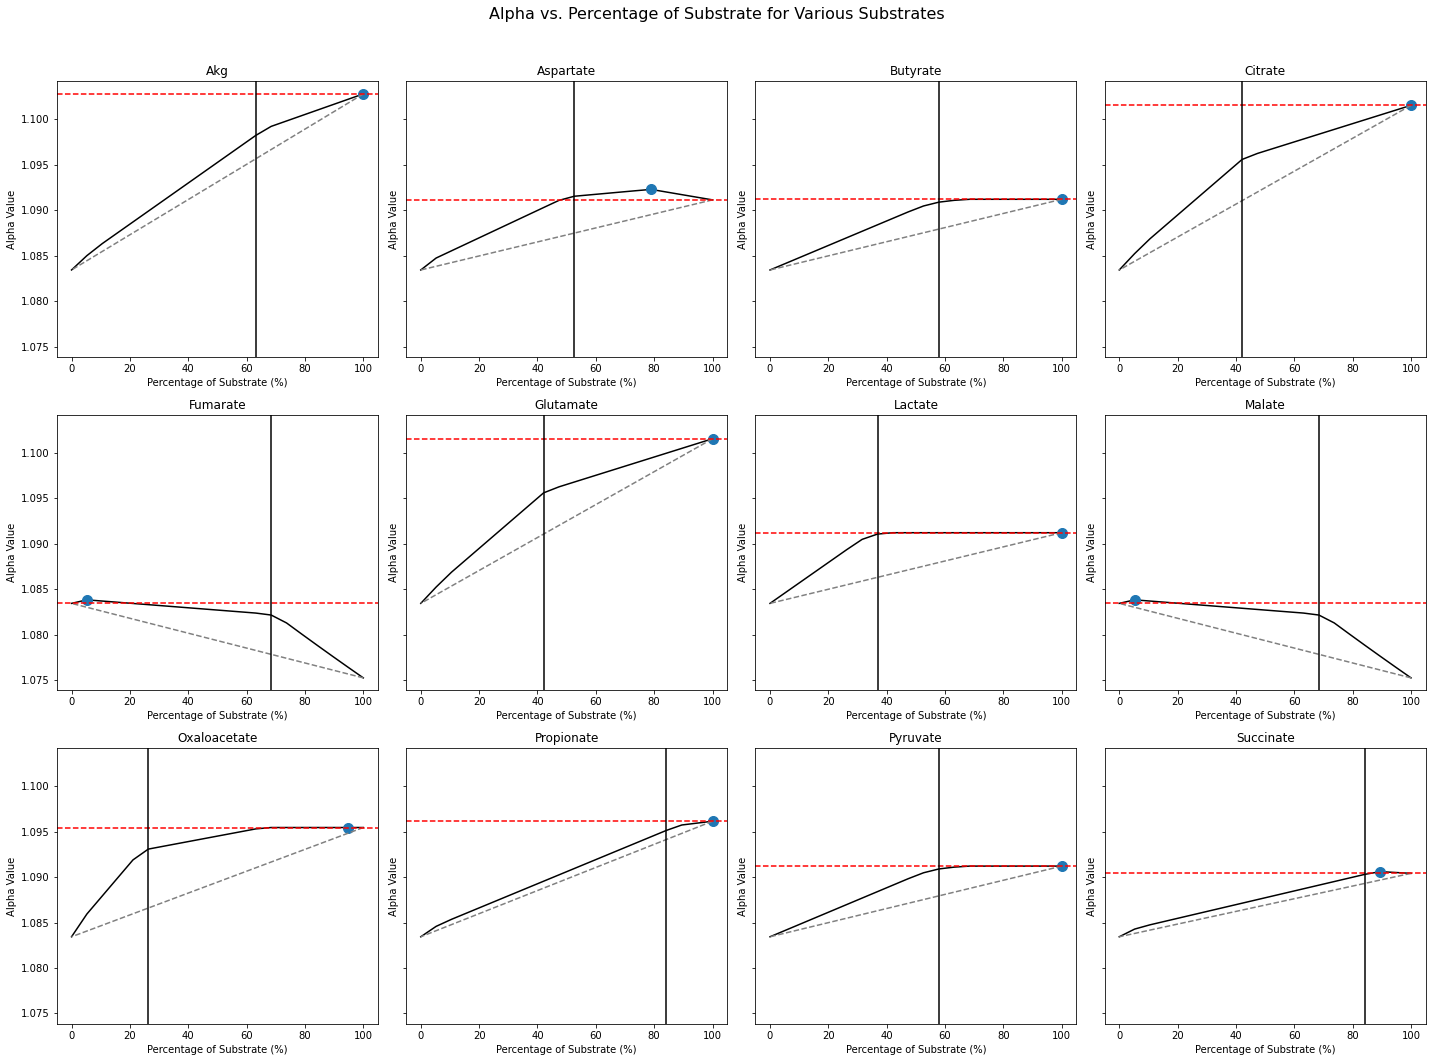

In [20]:
def plot_subplots(results):
    n_substrates = len(results)
    n_cols = 4
    n_rows = (n_substrates + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), sharey=True)
    fig.suptitle('Alpha vs. Percentage of Substrate for Various Substrates', fontsize=16)

    for ax, (substrate, data) in zip(axes.flatten(), results.items()):
        alpha_values = data['alpha_values']
        perc_substrate = data['perc_substrate']
        
        # Plot the alpha values with black lines
        ax.plot(perc_substrate, alpha_values, linestyle='-', color='black')
        
        # Highlight the highest alpha value with a blue dot
        max_idx = np.argmax(alpha_values)
        ax.plot(perc_substrate[max_idx], alpha_values[max_idx], marker='o', markersize = 10)
        
        # Plot the linear line connecting the first and last points
        ax.plot([perc_substrate[0], perc_substrate[-1]], [alpha_values[0], alpha_values[-1]], linestyle='--', color='gray')
        
        # Determine whether to add the horizontal line at the first or last point
        first_alpha = alpha_values[0]
        last_alpha = alpha_values[-1]
        if first_alpha >= last_alpha:
            ax.axhline(y=first_alpha, linestyle='--', color='red')
        else:
            ax.axhline(y=last_alpha, linestyle='--', color='red')
            
        # Calculate the largest distance between the black line and the dotted straight line
        m = (alpha_values[-1] - alpha_values[0]) / (perc_substrate[-1] - perc_substrate[0])
        b = alpha_values[0] - m * perc_substrate[0]
        distances = np.abs(alpha_values - (m * perc_substrate + b))
        max_dist_idx = np.argmax(distances)
        
        # Plot the vertical line at the point with the largest distance
        ax.axvline(x=perc_substrate[max_dist_idx], linestyle='-', color='black')

        
        # Calculate the area between the black line and the dotted straight line
        dotted_line_values = m * perc_substrate + b
        area = trapezoid(np.abs(alpha_values - dotted_line_values), perc_substrate)
        print(f'Area between lines for {substrate.capitalize()}: {area:.4f}')
        

        ax.set_title(substrate.capitalize())
        ax.set_xlabel('Percentage of Substrate (%)')
        ax.set_ylabel('Alpha Value')

    # Hide any empty subplots
    for ax in axes.flatten()[n_substrates:]:
        fig.delaxes(ax)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_subplots(results)

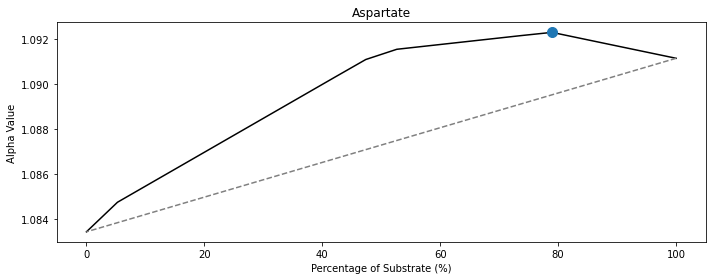

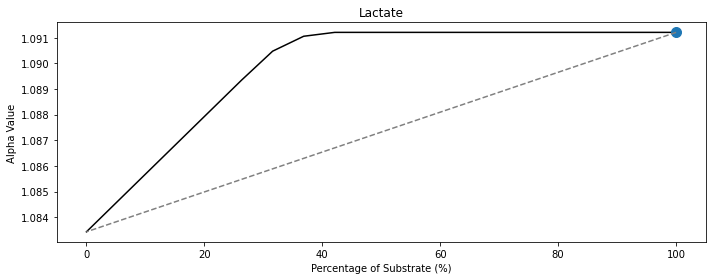

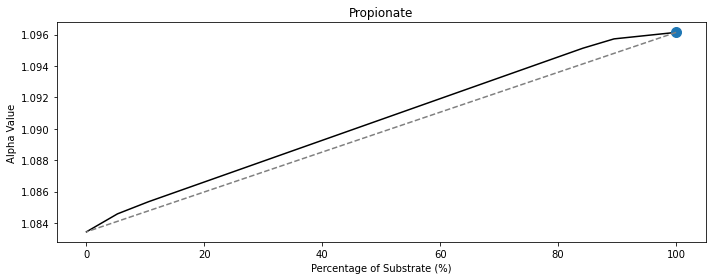

In [37]:
def plot_single_substrate(results, substrate_name):
    if substrate_name not in results:
        print(f"Substrate {substrate_name} not found in results.")
        return

    data = results[substrate_name]
    alpha_values = data['alpha_values']
    perc_substrate = data['perc_substrate']
    
    fig, ax = plt.subplots(figsize=(10, 4))

    # Plot the alpha values with black lines
    ax.plot(perc_substrate, alpha_values, linestyle='-', color='black')
    
    # Highlight the highest alpha value with a blue dot
    max_idx = np.argmax(alpha_values)
    ax.plot(perc_substrate[max_idx], alpha_values[max_idx], marker='o', markersize=10)
    
    # Plot the linear line connecting the first and last points
    ax.plot([perc_substrate[0], perc_substrate[-1]], [alpha_values[0], alpha_values[-1]], linestyle='--', color='gray')
    
    
    ax.set_title(f'{substrate_name.capitalize()}')
    ax.set_xlabel('Percentage of Substrate (%)')
    ax.set_ylabel('Alpha Value')
    
    plt.tight_layout()

# Plot single substrates
plot_single_substrate(results, 'aspartate')
plt.savefig('Acetate and aspartate.png', dpi = 300)
plt.show()
plot_single_substrate(results, 'lactate')
plt.savefig('Acetate and lactate.png', dpi = 300)
plt.show()
plot_single_substrate(results, 'propionate')
plt.savefig('Acetate and propionate.png', dpi = 300)
plt.show()
